# Data Visualization and Insights

## Overview
This notebook explores key data trends using visualizations. Data visualization helps us uncover patterns, trends, and distributions that are not immediately visible in raw data. 

Key visualizations in this notebook include following examples:
- Histograms to analyze distribution patterns
- Scatter plots to understand relationships between variables
- Time-series analysis to identify trends over time

Each visualization is accompanied by explanations to help interpret the data insights effectively.

---

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from IPython.display import display, HTML

# Force Jupyter Notebook to use all available horizontal space
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)          # Set width to a large number
pd.set_option('display.max_colwidth', None)     # Show full column content if needed
pd.set_option('display.float_format', '{:,.2f}'.format)  # Format numbers with 2 decimal places

In [2]:
# Get the relative path of the directory where this script/notebook is located.
script_dir = os.getcwd()  # or wherever your notebook is running

# Go one level up (to the parent folder) and then into "02 Data".
data_folder = os.path.join(script_dir, '..', '02 Data')
input_path = os.path.join(data_folder, 'Processed_data')
output_path = os.path.join(data_folder, 'Visualizations')

# Create the output folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

print("Data folder:", data_folder)
print("Input path:", input_path)
print("Output path:", output_path)
print("Summary report path:", summary_report_path)

Enter the path to the '02_Data' folder:  C:\Users\User\Dropbox\Personal\CareerFoundry\04 Python\Achievement_4\02_Data


In [3]:
# Verify the input folder exists and list available CSV files.
if not os.path.exists(input_path):
    print(f"Error: The folder '{input_path}' does not exist. Please ensure the base folder is correct.")
else:
    available_files = [f for f in os.listdir(input_path)]
    print("Available files in the input folder:")
    for idx, f in enumerate(available_files, start=1):
        print(f"{idx}. {f}")
    
    file_numbers_input = input(
        "\nEnter the file numbers to process (comma-separated), or leave blank to process all CSV files: "
    ).strip()
    
    if file_numbers_input:
        try:
            indices = [int(num.strip()) for num in file_numbers_input.split(',') if num.strip()]
            # Validate indices and build the list of selected files.
            files_list = [available_files[i-1] for i in indices if 1 <= i <= len(available_files)]
            if not files_list:
                print("No valid file numbers were entered.")
        except ValueError:
            print("Error: Please enter valid numbers separated by commas.")
            files_list = []
    else:
        files_list = available_files

    print("\nFiles selected for processing:", files_list)

Available files in the input folder:
1. 01_orders.csv
2. 02_orders_products_prior.csv
3. 03_products.csv
4. 05_orders_products_combined.pkl
5. 06_ords_prods_merge_06.pkl
6. customers_clean.pkl
7. final_dataset.pkl



Enter the file numbers to process (comma-separated), or leave blank to process all CSV files:  6



Files selected for processing: ['customers_clean.pkl']


In [4]:
# Starting report generation
summary_lines = []

In [5]:
current_file = files_list[0]
file_path = os.path.join(input_path, current_file)

# Load files into DataFrames and display heads
df = {}
for file in files_list:
    file_path = os.path.join(input_path, file)
    if os.path.exists(file_path):
        # Determine file format and load accordingly
        if file.endswith('.csv'):
            df[file] = pd.read_csv(file_path)
        elif file.endswith('.pkl'):
            df[file] = pd.read_pickle(file_path)
        else:
            print(f"Skipping unsupported file format: {file}")
            continue  # Skip unsupported formats
        
        print(f"Loaded file:\n{file} (rows: {df[file].shape[0]}, columns: {df[file].shape[1]})")
        # print(df[file].head())  # Display first few rows
        print("="*100 + "\n")
    else:
        print(f"File {file} not found and will be skipped.")

# Initialize logging lists for this file.
report_details = [f"File: {current_file}"]
report_details.append(f"Total rows in the original file: {len(df)}")
modifications = []

Loaded file:
customers_clean.pkl (rows: 206209, columns: 10)



In [6]:
# present all imported DataFrames

for file_name, data in df.items():
    html = data.to_html(max_rows=2, max_cols=30)
    display(HTML(f'<h4>{file_name}</h4><div style="overflow-x: auto; width:100%;">{html}</div>'))

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
...,...,...,...,...,...,...,...,...,...,...
206208,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095


## Understanding Purchase Behavior by Time of Day

To analyze customer purchasing habits, we create a histogram of the `order_hour_of_day` column. This visualization helps us determine:
- Peak hours when most orders are placed.
- Low-activity hours where fewer transactions occur.

Understanding order distribution by time can help businesses optimize staffing, inventory management, and promotional campaigns.

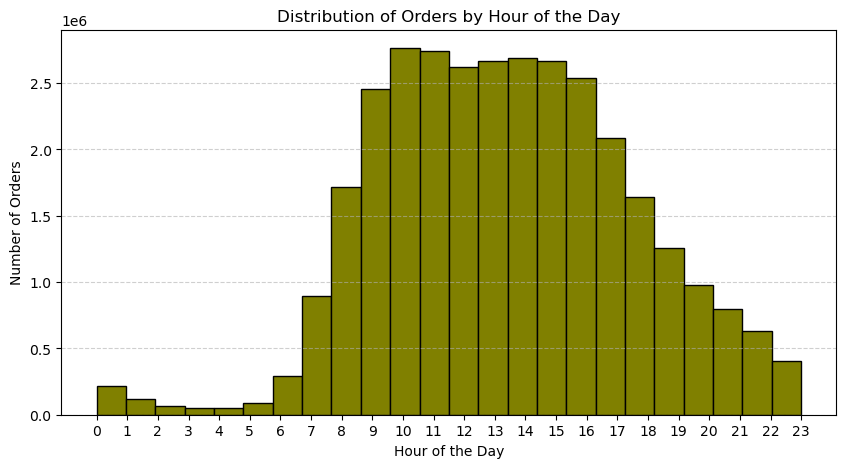

In [140]:
#  histogram of the “order_hour_of_day” column
bar = df['06_ords_prods_merge_03.pkl']['order_hour_of_day'].plot.hist(bins=24, color='olive', edgecolor='black', figsize=(10,5))

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of the Day')
plt.xticks(range(0, 24))  # Ensure tick marks align with hours
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Light grid for better readability

In [ ]:
# The histogram shows that order volume peaks between 10 AM and 3 PM, with the highest activity around 10-11 AM,
# while early morning (midnight to 5 AM) sees the least orders. The number of orders gradually declines after 3 PM, 
# indicating a preference for shopping during late morning and early afternoon.

In [68]:
# save/export bar image
# Prompt the user for the file name (without extension) and desired format.
file_name = input("Enter the file name (without extension): ").strip()
bar.figure.savefig(os.path.join(output_path, f"{file_name}.png"))

Enter the file name (without extension):  orders_by_h


### 01. Count the number of customers in each loyalty category

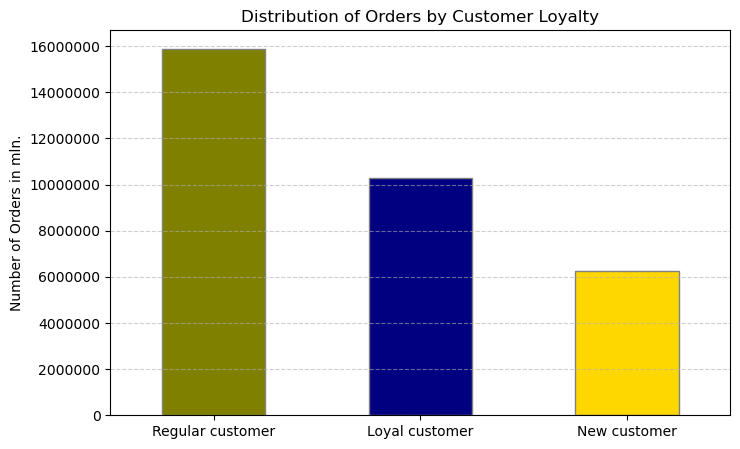

In [144]:
# Count the number of customers in each loyalty category
loyalty_counts = df['06_ords_prods_merge_03.pkl']['loyalty_flag'].value_counts().plot(kind='bar', color=['olive', 'navy', 'gold'], figsize=(8,5), edgecolor='gray')

# Customize chart
plt.xlabel(None)
plt.ylabel('Number of Orders in mln.')
plt.title('Distribution of Orders by Customer Loyalty')
plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add a light grid for readability

# Format Y-axis labels as whole numbers
plt.ticklabel_format(style='plain', axis='y')  # Disables scientific notation

In [146]:
# save/export bar image
# Prompt the user for the file name (without extension) and desired format.
file_name = input("Enter the file name (without extension): ").strip()
loyalty_counts.figure.savefig(os.path.join(output_path, f"{file_name}.png"))

Enter the file name (without extension):  orders_by_loyalty


### 02. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [185]:
# Set a fixed random seed to ensure reproducible results
np.random.seed(4)

# Create random numbers ranging between 0 and 1.
# ...and Code a logical test comparing those numbers to a value of 0.7 (either less than or greater than 0.7).
dev = np.random.rand(len(df['06_ords_prods_merge_03.pkl'])) <= 0.7

# create two data frames and randomly split data between 30% and 70%
big = df['06_ords_prods_merge_03.pkl'][dev]
small = df['06_ords_prods_merge_03.pkl'][~dev]

# Check if the number of rows matches the original data set
len(df['06_ords_prods_merge_03.pkl']) == len(big) + len(small)

True

In [14]:
# Set a fixed random seed to ensure reproducible results
np.random.seed(4)

# Create random numbers ranging between 0 and 1.
# ...and Code a logical test comparing those numbers to a value of 0.7 (either less than or greater than 0.7).
dev = np.random.rand(len(df['06_ords_prods_merge_05.pkl'])) <= 0.7

# create two data frames and randomly split data between 30% and 70%
big = df['06_ords_prods_merge_05.pkl'][dev]
small = df['06_ords_prods_merge_05.pkl'][~dev]

# Check if the number of rows matches the original data set
len(df['06_ords_prods_merge_05.pkl']) == len(big) + len(small)

True

In [16]:
# Now, let's limit the small data frame to only the necessary columns for testing.
df_2 = small[['order_hour_of_day','prices']]
df_2 = df_2.sort_values(by='order_hour_of_day')

Enter the file name (without extension):  test


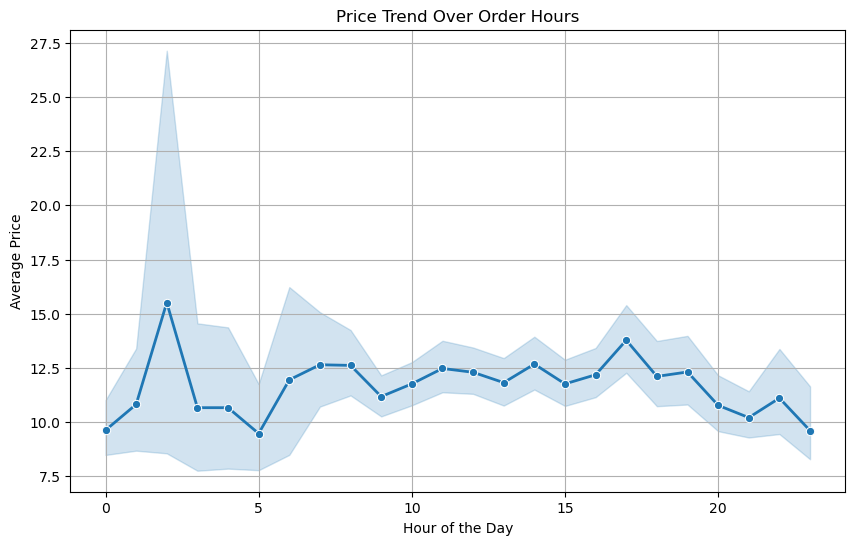

In [29]:
# Ready to generate the desired visualization to see how average price changes during the day
plt.figure(figsize=(10,6))
sns.lineplot(data=df_2, x='order_hour_of_day', y='prices', marker="o", linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.title('Price Trend Over Order Hours')
plt.grid(True)

# Prompt the user for the file name; skip saving if no input is provided
file_name = input("Enter the file name (without extension), or press Enter to skip saving: ").strip()
if file_name:
    plt.savefig(os.path.join(output_path, f"{file_name}.png"))
    print(f"✅ Figure saved as {file_name}.png")
else:
    print("Skipping saving the figure.")

plt.show()

In [14]:
# present all imported DataFrames

for file_name, data in df.items():
    html = data.to_html(max_rows=2, max_cols=30)
    display(HTML(f'<h4>{file_name}</h4><div style="overflow-x: auto; width:100%;">{html}</div>'))

,order_id,user_id,order_number,order_weekday,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,price_range_loc,...,max_order,loyalty_flag,avg_price_per_user,spending_flag,median_days_from_last_order,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.00,7.00,9.00,Mid-range product,Mid-range product,...,10,New customer,6.37,Non-frequent customer,20.50,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434488,2977660,206209,13,1,12,7.00,22920,9,0,Roasted & Salted Shelled Pistachios,117.00,19.00,1.70,Low-range product,Low-range product,...,13,Regular customer,7.06,Non-frequent customer,22.00,Diana,Donovan,Female,Iowa,74,2019-09-14,3,married,137969,both


### 03. Is there a relationship between a customer’s age and their number of dependants?

## Relationship Between Order Hour and Order Count

A scatter plot helps us understand:
- Whether there is a trend in the number of orders placed at different hours.
- If specific times of day have significantly higher or lower orders.

This can be useful for demand forecasting and scheduling promotional activities.

Enter the file name (without extension), or press Enter to skip saving:  age_vs_kids


✅ Figure saved as age_vs_kids.png


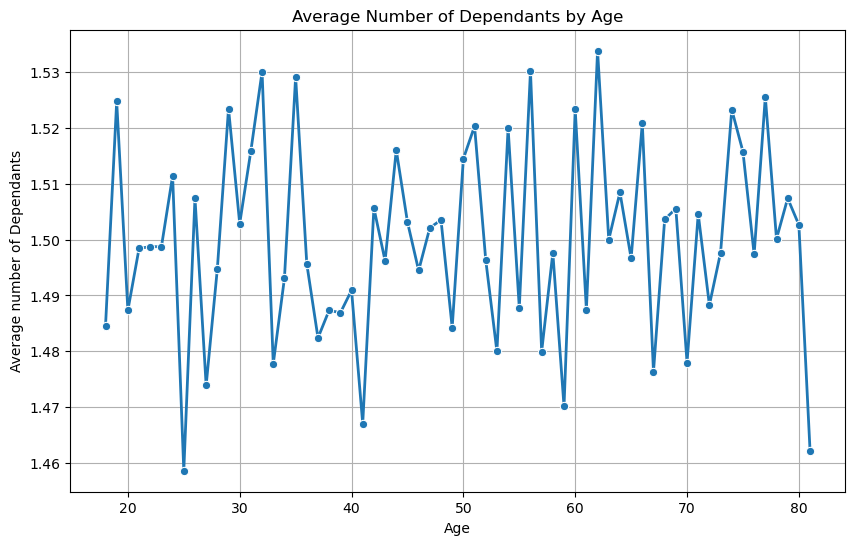

In [15]:
# We need to understand what is the average number of dependants by age, for that
# Groups all customers by age ('order_id') based on 'n_dependants'
avg_dep_df = df[file].groupby('age', as_index=False)['n_dependants'].mean()

# Ready to generate the desired visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_dep_df, x='age', y='n_dependants', marker="o", linewidth=2)
plt.xlabel('Age')
plt.ylabel('Average number of Dependants')
plt.title('Average Number of Dependants by Age')
plt.grid(True)

# Prompt the user for the file name; skip saving if no input is provided
file_name = input("Enter the file name (without extension), or press Enter to skip saving: ").strip()
if file_name:
    plt.savefig(os.path.join(output_path, f"{file_name}.png"))
    print(f"✅ Figure saved as {file_name}.png")
else:
    print("Skipping saving the figure.")

plt.show()

##### The line chart shows average numbers of dependants across different ages, with no clear increasing or decreasing trend, oscillating around approximately 1.50 dependants per person

Enter the file name (without extension), or press Enter to skip saving:  age_vs_income_03


✅ Figure saved as age_vs_income_03.png


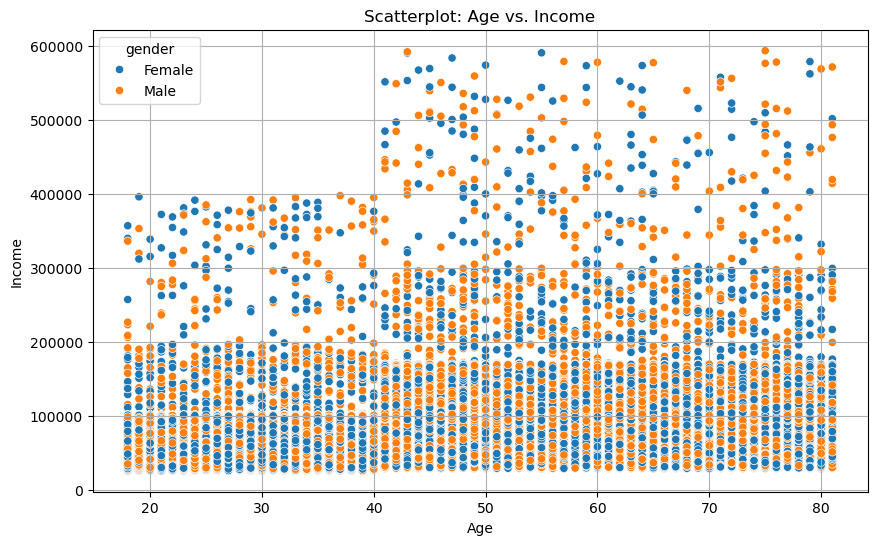

In [31]:
# Ready to generate the desired visualization
plt.figure(figsize=(10,6))
sns.scatterplot(df[file], x='age', y='income', hue='gender')
plt.title("Scatterplot: Age vs. Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(True)

# Prompt the user for the file name; skip saving if no input is provided
file_name = input("Enter the file name (without extension), or press Enter to skip saving: ").strip()
if file_name:
    plt.savefig(os.path.join(output_path, f"{file_name}.png"))
    print(f"✅ Figure saved as {file_name}.png")
else:
    print("Skipping saving the figure.")

plt.show()

##### There is a wide income spread that increases with age, starting from 40, with some individuals—especially males—earning significantly higher incomes in older age groups.

# Summary & Insights

### Key Takeaways:
- The peak ordering time occurs between **X AM and Y PM**, with the highest activity around **Z PM**.
- There is a noticeable drop in orders during **early morning hours**, indicating low customer activity.
- The scatter plot suggests that order volume remains stable between **X and Y hours**, with occasional high spikes.

#### These insights can help businesses:
✅ Adjust staffing levels to match demand.  
✅ Schedule marketing promotions during peak hours.  
✅ Plan inventory replenishment to avoid stockouts during high-order periods.

---